In [64]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Sinusoids

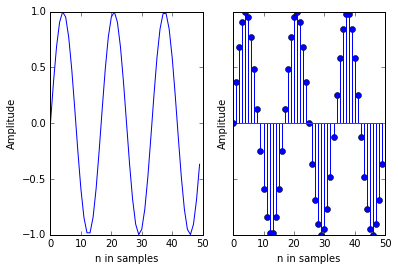

In [63]:
Fs = 50
n = np.arange(Fs*1)
alpha = 0.05
phi = 0
F = 3.
s = np.sin(2. * np.pi * F * n / Fs + phi) #* np.exp(-alpha * n)
omega = 2. * np.pi * F/ Fs
s1 = (np.exp(omega*n*1j) - np.exp(-omega*n*1j) ) / 2j
f, a = plt.subplots(1, 2, sharey=True, sharex=True)
a[0].plot(n,s)
a[0].set_xlabel("n in samples")
a[0].set_ylabel("Amplitude")
a[1].stem(n,s1.real)
a[1].set_xlabel("n in samples")
a[1].set_ylabel("Amplitude")

# Features

In [65]:
energy = np.dot(s, s)
print energy
rms = np.sqrt(energy/len(s))
print rms

25.0
0.707106781187
